In [ ]:
## Import Packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
from collections import Counter

In [87]:
import matplotlib.pyplot as plt

In [10]:
import re

In [ ]:
## Import Data

In [2]:
df_95 = pd.read_csv('1995_Street_Tree_Census.csv')

In [29]:
at = pd.read_csv('tree_species_nyc - 2008_approved_species.csv')

In [4]:
df_95.head(4)

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,Wires,Sidewalk_Condition,Support_Structure,Borough,X,Y,Longitude,Latitude,CB_New,Zip_New,CensusTract_2010,CensusBlock_2010,NTA_2010,SegmentID,Spc_Common,Spc_Latin,Location,Council District,BIN,BBL
0,1,245 E 17 ST,245.0,E 17 ST,10003,106,Front,PLAC,8,Unknown,None,NaN,None,Manhattan,988618.9688,206893.7640,-73.984235,40.734551,106,10003,48.0,2000.0,MN21,33134,LONDON PLANETREE,PLATANUS ACERIFOLIA,"(40.734551, -73.984235)",2.0,1019566.0,1.008980e+09
1,2,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09
2,3,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,6,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09
3,4,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Excellent,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09


In [6]:
speciea_95 = list(df_95.Spc_Common.unique())

In [7]:
len(speciea_95)

276

In [8]:
pd.DataFrame(pd.value_counts(df_95['Spc_Common']))

,Spc_Common
"MAPLE, NORWAY",109321
LONDON PLANETREE,88040
"OAK, PIN",36553
HONEYLOCUST,33727
"PEAR, CALLERY",31293
"LINDEN, LITTLE LEAF",26489
"MAPLE, SILVER",22347
"MAPLE, RED",17993
"ASH, GREEN",17684
"MAPLE, SUGAR",15355


In [ ]:
## From this we can see that there are a big number of varieties that include trees 
##that are not known, stumps, dead or otherwise ineligible to be counted towards 
##creating our visualization.
##Let's create a list of the ineligble 'varieties'

In [9]:
inel_varieties = ['UNKNOWN STUMP', 'UNKNOWN DEAD TREES', 'PLANTING SITE', 'UNKNOWN LIVE TREES', 'STUMP', 'UNKNOWN SHAFT', 'SHRUB']

In [98]:
inel_varieties2 = ['UNKNOWN STUMP', 'UNKNOWN DEAD TREES', 'PLANTING SITE', 'STUMP', 'UNKNOWN SHAFT', 'SHRUB']

In [14]:
df_95 = df_95.loc[~df_95['Spc_Common'].isin(inel_varieties)]

In [15]:
len(list(df_95.Spc_Common.unique()))

269

In [91]:
viable_95 = df_95.loc[~df_95['Spc_Common'].isin(inel_varieties)]

In [99]:
len(pd.DataFrame(df_95.loc[~df_95['Spc_Common'].isin(inel_varieties2)]))

471580

In [95]:
viable_95.shape()

TypeError: 'tuple' object is not callable

In [17]:
list(df_95.Spc_Common.unique())

['LONDON PLANETREE',
 'MAPLE, NORWAY',
 'JAPANESE PAGODA TREE',
 'OAK, PIN',
 'LINDEN, LITTLE LEAF',
 'ASH, GREEN',
 'EASTERN HOP HORNBEAM',
 'HONEYLOCUST',
 'GINKGO',
 'ELM, AMERICAN',
 'CHERRY, OTHER',
 'PEAR, CALLERY',
 'OAK, NORTHERN RED',
 'MAPLE, SILVER',
 'ZELKOVA, JAPANESE',
 'TREE OF HEAVEN',
 'HAWTHORN, OTHER',
 'CHERRY, CORNELIAN',
 'BIRCH, OTHER',
 'OAK, WILLOW',
 'APPLE',
 'BLACKGUM',
 'MAGNOLIA, OTHER',
 'MAPLE, SYCAMORE',
 'MAPLE, OTHER',
 'MAPLE, RED',
 'MAPLE, SUGAR',
 'REDWOOD, COAST',
 'FIR, OTHER',
 'LINDEN, OTHER',
 'OAK, OTHER',
 'HACKBERRY',
 'SWEETGUM',
 'WILLOW SPECIES',
 'ELM, OTHER',
 'SERVICEBERRY, OTHER',
 'PINE, OTHER',
 'ILEX',
 'BLACK LOCUST',
 'AMUR CORKTREE',
 'BEECH, AMERICAN',
 'CHERRY, BLACK',
 'MULBERRY, WHITE',
 'POPLAR, BALSAM',
 'OAK, ENGLISH',
 'MIMOSA',
 'BEECH, OTHER',
 'MULBERRY, RED',
 'EASTERN REDCEDAR',
 'ATLANTIC WHITE CEDAR',
 'SPRUCE, OTHER',
 'MOUNTAIN-ASH, EURO.',
 'CYPRESS, LEYLAND',
 'ARBORVITAE, AMERICAN',
 'EASTERN REDBUD',
 'CED

In [ ]:
## Let's only look at viable trees to establish an accurate idea of 
##tree varieties that are likely to last until the next census

In [18]:
pd.value_counts(df_95['Condition'])

Good         326101
Excellent     98426
Poor          37586
Unknown        9144
Dead           6014
Stump           731
Fair            323
Shaft           105
Critical          2
Name: Condition, dtype: int64

In [19]:
non_viable = ['Critical', 'Shaft', 'Stump', 'Dead']

In [20]:
df_95 = df_95.loc[~df_95['Condition'].isin(non_viable)]

In [21]:
len(list(df_95.Spc_Common.unique()))

268

In [24]:
len(df_95[df_95.Borough == 'Brooklyn'].Spc_Common.unique())

181

In [25]:
len(df_95[df_95.Borough == 'Bronx'].Spc_Common.unique())

143

In [26]:
len(df_95[df_95.Borough == 'Queens'].Spc_Common.unique())

172

In [27]:
len(df_95[df_95.Borough == 'Staten Island'].Spc_Common.unique())

118

In [28]:
len(df_95[df_95.Borough == 'Manhattan'].Spc_Common.unique())

79

In [ ]:
## To look at % of trees that are approved (based on the 2008
## approved species list being the latest I could find) street tree
## varieties I needed to create a list

In [34]:
asl = list(at.Common_Name.values)

In [51]:
pd.value_counts(df_95['Spc_Common'])

MAPLE, NORWAY           106909
LONDON PLANETREE         87287
OAK, PIN                 36223
HONEYLOCUST              33296
PEAR, CALLERY            30890
LINDEN, LITTLE LEAF      26092
MAPLE, SILVER            22179
MAPLE, RED               17741
ASH, GREEN               17477
MAPLE, SUGAR             15117
GINKGO                   13480
JAPANESE PAGODA TREE      8427
MAPLE, SYCAMORE           7494
OAK, NORTHERN RED         6640
SWEETGUM                  6625
ELM, AMERICAN             5958
ZELKOVA, JAPANESE         5645
CHERRY, CORNELIAN         2558
TREE OF HEAVEN            2400
OAK, WILLOW               1949
PINE, OTHER               1341
EASTERN HOP HORNBEAM      1093
HACKBERRY                  987
HORSECHESTNUT              848
BLACKGUM                   805
CHERRY, BLACK              803
MAPLE, OTHER               774
CHERRY, OTHER              715
HAWTHORN, OTHER            611
APPLE                      490
LINDEN, OTHER              463
MAPLE, JAPANESE            419
BIRCH, O

In [54]:
species_aw = pd.DataFrame(pd.value_counts(df_95['Spc_Common'].unique()))

In [55]:
species_aw

,0
KENTUCKY COFFEETREE,1
HIBISCUS,1
MONKEY PUZZLE TREE,1
EASTERN HOP HORNBEAM,1
"OAK, BLUEJACK",1
"MAGNOLIA, CHINESE",1
"POPLAR, OTHER",1
"ELM, SIBERIAN",1
"SPRUCE, NORWAY",1
"MAGNOLIA, SOUTHERN",1


In [ ]:
#Export as csv to get known common names of trees in census

In [56]:
species_aw.to_csv(r'species_asis.csv')

In [52]:
df_95['Spc_Common'].unique()

array(['LONDON PLANETREE', 'MAPLE, NORWAY', 'JAPANESE PAGODA TREE',
       'OAK, PIN', 'LINDEN, LITTLE LEAF', 'ASH, GREEN',
       'EASTERN HOP HORNBEAM', 'HONEYLOCUST', 'GINKGO', 'ELM, AMERICAN',
       'CHERRY, OTHER', 'PEAR, CALLERY', 'OAK, NORTHERN RED',
       'MAPLE, SILVER', 'ZELKOVA, JAPANESE', 'TREE OF HEAVEN',
       'HAWTHORN, OTHER', 'CHERRY, CORNELIAN', 'BIRCH, OTHER',
       'OAK, WILLOW', 'APPLE', 'BLACKGUM', 'MAGNOLIA, OTHER',
       'MAPLE, SYCAMORE', 'MAPLE, OTHER', 'MAPLE, RED', 'MAPLE, SUGAR',
       'REDWOOD, COAST', 'FIR, OTHER', 'LINDEN, OTHER', 'OAK, OTHER',
       'HACKBERRY', 'SWEETGUM', 'WILLOW SPECIES', 'ELM, OTHER',
       'SERVICEBERRY, OTHER', 'PINE, OTHER', 'ILEX', 'BLACK LOCUST',
       'AMUR CORKTREE', 'BEECH, AMERICAN', 'CHERRY, BLACK',
       'MULBERRY, WHITE', 'POPLAR, BALSAM', 'OAK, ENGLISH', 'MIMOSA',
       'BEECH, OTHER', 'MULBERRY, RED', 'EASTERN REDCEDAR',
       'ATLANTIC WHITE CEDAR', 'SPRUCE, OTHER', 'MOUNTAIN-ASH, EURO.',
       'CYPRESS, 

In [58]:
acn_sn = df_95.drop_duplicates('Spc_Common')

In [60]:
acn_sn.head(1)

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,Wires,Sidewalk_Condition,Support_Structure,Borough,X,Y,Longitude,Latitude,CB_New,Zip_New,CensusTract_2010,CensusBlock_2010,NTA_2010,SegmentID,Spc_Common,Spc_Latin,Location,Council District,BIN,BBL
0,1,245 E 17 ST,245.0,E 17 ST,10003,106,Front,PLAC,8,Unknown,None,NaN,None,Manhattan,988618.9688,206893.764,-73.984235,40.734551,106,10003,48.0,2000.0,MN21,33134,LONDON PLANETREE,PLATANUS ACERIFOLIA,"(40.734551, -73.984235)",2.0,1019566.0,1.008980e+09


In [62]:
acn_sn = acn_sn[['Species', 'Spc_Common', 'Spc_Latin']]

In [63]:
acn_sn.head(1)

,Species,Spc_Common,Spc_Latin
0,PLAC,LONDON PLANETREE,PLATANUS ACERIFOLIA


In [65]:
acn_sn.to_csv(r'species_asis.csv')

In [66]:
acn_sn['Spc_Latin'].duplicated().any() 

True

In [ ]:
df[df['countries'].isin(c2)]

In [50]:
df_95[df_95['Spc_Common'].isin(asl)]

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,Wires,Sidewalk_Condition,Support_Structure,Borough,X,Y,Longitude,Latitude,CB_New,Zip_New,CensusTract_2010,CensusBlock_2010,NTA_2010,SegmentID,Spc_Common,Spc_Latin,Location,Council District,BIN,BBL


In [ ]:
## Import Updated Species List

In [67]:
at_08 = pd.read_csv('nyc_approved_2008_trees.csv')

In [68]:
at_08.head(3)

,Scientific_Name,Census_Common,Common_Name,Form,Growth_Rate,Fall_Color,Notes_1,Notes_2,Notes_3,Matured_Size,All_5,BX_Only,Unnamed: 12
0,Ginkgo biloba,GINKGO,Ginkgo,Upright,Slow,Yellow,Male Only,Does not bear fruit,NaN,Large,1,0,NaN
1,Quercus spp. 'Fastigiata',NaN,Fastigiata Oak,Upright,Slow,Maroon,Similar tree is Quercus robur,NaN,NaN,Large,1,0,NaN
2,Liquidambar styraciflua,SWEETGUM,Sweetgum,Pyramidal,Medium,Yellow,Plant Spring Only,Lawn Pits Only,Look for 'Rotundiloba',Large,1,0,NaN


In [78]:
legal_common = list(at_08.Census_Common.dropna().unique())

In [79]:
legal_common

['GINKGO',
 'SWEETGUM',
 'DAWN REDWOOD',
 'BALDCYPRESS',
 'LINDEN, LITTLE LEAF',
 'KENTUCKY COFFEETREE',
 'HONEYLOCUST',
 'TULIP TREE',
 'OAK, NORTHERN RED',
 'OAK, SWAMP WHITE',
 'OAK, PIN',
 'OAK, WILLOW',
 'LINDEN, AMERICAN',
 'LINDEN, SILVER',
 'ZELKOVA, JAPANESE',
 'HACKBERRY',
 'ASH, GREEN-MARS SEED',
 'LONDON PLANETREE',
 'ELM, AMERICAN',
 'HORNBEAM, EUROPEAN',
 'OAK, ENGLISH',
 'KATSURA TREE',
 'BLACKGUM',
 'EASTERN HOP HORNBEAM',
 'OAK, SAWTOOTH',
 'MAPLE, ARMSTRONG',
 'ELM, CHINESE',
 'GOLDENRAIN TREE, S',
 'PEAR, CALLERY-ARISTO',
 'MAPLE, HEDGE',
 'EASTERN REDBUD',
 'HORNBEAM, AMERICAN',
 'CRABAPPLE',
 'HAWTHORN, GREEN',
 'CHERRY, CORNELIAN',
 'PLUM, PURPLELEAF',
 'CHERRY, SARGENT',
 'CHERRY, KWANZAN',
 'MAPLE, AMUR']

In [81]:
legal_95 = df_95[df_95['Spc_Common'].isin(legal_common)]

In [82]:
type(legal_95)

pandas.core.frame.DataFrame

In [84]:
legal_95.shape

(229681, 30)

In [83]:
illegal_95 = df_95[~df_95['Spc_Common'].isin(legal_common)]

In [85]:
illegal_95.shape

(241899, 30)

In [ ]:
names = ['Brooklyn', 'Bronx', 'Queens', 'Manhattan', 'Staten Island']
pop_grow = (c_merge['population_growth'] / 10**6)

plt.figure(figsize=(15,9))
plt.bar(names,pop_grow,width=0.6)
plt.xlabel('Country')
plt.ylabel('Population Growth (Millions)')
plt.title('Top 10 Countries w/the Biggest Population Growth from 1952 to 2007')
plt.xticks(rotation=45)

# zip joins x and y coordinates in pairs
for x,y in zip(names,pop_grow):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [88]:
illegal_95.head(2)

,RecordId,Address,House_Number,Street,Postcode_Original,Community Board_Original,Site,Species,Diameter,Condition,Wires,Sidewalk_Condition,Support_Structure,Borough,X,Y,Longitude,Latitude,CB_New,Zip_New,CensusTract_2010,CensusBlock_2010,NTA_2010,SegmentID,Spc_Common,Spc_Latin,Location,Council District,BIN,BBL
1,2,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,7,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09
2,3,80 N MOORE ST,80.0,N MOORE ST,10013,101,Side,ACPL,6,Good,None,Good,None,Manhattan,981330.4271,201649.9518,-74.010532,40.720159,101,10013,39.0,2001.0,MN24,31567,"MAPLE, NORWAY",ACER PLATANOIDES,"(40.720159, -74.010532)",1.0,1083157.0,1.001420e+09


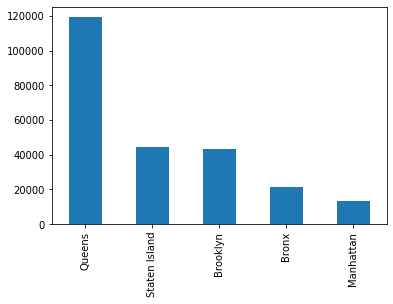

In [89]:
illegal_95['Borough'].value_counts().plot(kind='bar')

# zip joins x and y coordinates in pairs
for x,y in zip(Borough,illegal_95['Borough'].value_counts()):

    label = "{:f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

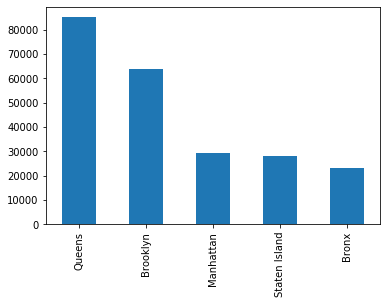

In [90]:
legal_95['Borough'].value_counts().plot(kind='bar')

In [ ]:
ax = illegal_95.plot.bar(x='Borough', y='val', rot=0)